#그래프(Graph)


>###그래프(영어: graph, 문화어: 그라프)는 일련의 꼭짓점들과 그 사이를 잇는 변들로 구성된 조합론적 구조이다.([위키](https://ko.wikipedia.org/wiki/%EA%B7%B8%EB%9E%98%ED%94%84))

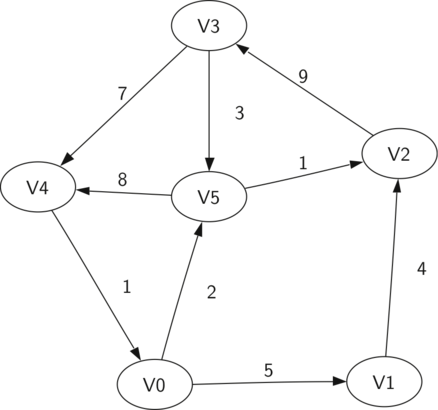

In [1]:
from IPython.display import Image
Image(filename='./img/digraph.png')

***
##용어 정의

###꼭짓점 (Vertex) 
>###노드(node)라고도 부르며, 키(key) 라고도 부름. 추가적인 정보(payload)를 갖을 수 있음.

###변 (Edge) 
>###노드와 노드를 연결하는 선. 호(arc)라고도 부름. 선의 방향의 유무로 방향그래프라고 부르기도 함(있을 경우)

###거리 (Weight) 
>###꼭짓점 사이를 건너가는데 필요한 비용 같은 것을 뜻함.

###Path 
>###시작점에서 도착점까지의 길 순서를 나타냄. 예. 위의 그림에서 V3에서 V1까지의 길은 ( V3, V4, V0, V1 )으로 표현함.

###Cycle 
>###방향 그래프에서 시작점과 도착점이 같을 경우를 말함. 예. 위의 그림에서 ( V5, V2, V3, V5 )의 길을 갖는 그래프는 사이클이라고 표현함.

## 추상 데이터 타입

- ## Graph()    : 빈 그래프 생성.

- ## addVertex(vert)    :  그래프에 꼭짓점 추가

- ## addEdge(fromVert, toVert)  :  두 꼭짓점을 잇는 방향 변 추가

- ## addEdge(fromVert, toVert, weight) : 두 꼭짓점을 잇는 방향 변 추가와 함께 거리 추가.

- ## getVertext(vertKey)  :  vertKey로 이름 지어진 꼭짓점 찾기

- ## getVertices()  : 그래프의 모든 꼭짓점의 리스트를 반환

- ## in  : 그래프에서 주어진 꼭짓점이 있으면 참을 반환, 없으면 거짓 반환.




********

## 구현 방법 

##1. 인접 행렬
![인접 행렬](./img/adjMat.png)

###각각의 행과 열의 요소를 하나의 꼭짓점(Vertex)으로 표현
###행과 열이 만나 값이 들어 있는 칸을 하나의 *변*(Edge)으로 표현하며, 값은 두개의 꼭짓점의 거리로 표현.

- ###<font color="blue">장점</font>
> ###단순하고, 사람이 이해하기 쉽다.

- ###<font color="red">단점</font>
> ###희소행렬(sparse matrix)이 대부분이라서 데이터 저장에 효율적이지 못하다.


###<font color="green">결론</font> : 변(edge)들이 많을수록 효율적!


##2. 인접 리스트
![인접 리스트](./img/adjlist.png)

### 모든 꼭짓점(Vertex)의 리스트를 가지는 최상위 리스트를 구성.
### 각각의 꼭짓점(Vertex)는 연결되는 꼭짓점(Vertex)의 정보를 가짐.
### 여기에선 Vertex를 리스트로 구현하기보다는 Dictionary로 구현.

- ###<font color="blue">장점</font>
> ###희소행렬이라도 데이터 저장에 효율적이다.



In [2]:
class Vertex:
    def __init__(self,key):
        self.id = key
        self.connectedTo = {}

    def addNeighbor(self,nbr,weight=0):
        self.connectedTo[nbr] = weight

    def __str__(self):
        return str(self.id) + ' connectedTo: ' + str([x.id for x in self.connectedTo])

    def getConnections(self):
        return self.connectedTo.keys()

    def getId(self):
        return self.id

    def getWeight(self,nbr):
        return self.connectedTo[nbr]

In [4]:
class Graph:
    def __init__(self):
        self.vertList = {}
        self.numVertices = 0

    def addVertex(self,key):
        self.numVertices = self.numVertices + 1
        newVertex = Vertex(key)
        self.vertList[key] = newVertex
        return newVertex

    def getVertex(self,n):
        if n in self.vertList:
            return self.vertList[n]
        else:
            return None

    def __contains__(self,n):
        return n in self.vertList

    def addEdge(self,f,t,cost=0):
        if f not in self.vertList:
            nv = self.addVertex(f)
        if t not in self.vertList:
            nv = self.addVertex(t)
        self.vertList[f].addNeighbor(self.vertList[t], cost)

    def getVertices(self):
        return self.vertList.keys()

    def __iter__(self):
        return iter(self.vertList.values())


In [8]:
g = Graph()
for i in range(6):
    g.addVertex(i)
g.vertList
g.addEdge(0,1,5)
g.addEdge(0,5,2)
g.addEdge(1,2,4)
g.addEdge(2,3,9)
g.addEdge(3,4,7)
g.addEdge(3,5,3)
g.addEdge(4,0,1)
g.addEdge(5,4,8)
g.addEdge(5,2,1)
for v in g:
    for w in v.getConnections():
        print("( %s , %s )" % (v.getId(), w.getId()))

        

( 0 , 5 )
( 0 , 1 )
( 1 , 2 )
( 2 , 3 )
( 3 , 5 )
( 3 , 4 )
( 4 , 0 )
( 5 , 2 )
( 5 , 4 )
